## Fully Connected VAE

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
z_dim = 20
batch_size = 100
nb_steps = 50000

In [3]:
def render_images(np_x):
    np_x = np_x.reshape((10,10,28,28))
    np_x = np.concatenate(np.split(np_x,10,axis=0),axis=3)
    np_x = np.concatenate(np.split(np_x,10,axis=1),axis=2)
    x_img = np.squeeze(np_x)
    plt.imshow(x_img, cmap='Greys_r')
    plt.title('Generation')
    plt.show()

In [4]:
def encoder(x, z_dim=20, reuse=False):
    with tf.variable_scope("encoder", reuse=reuse):
        l1 = tf.layers.dense(x, 512, activation=tf.nn.relu)
        l2 = tf.layers.dense(l1, 256, activation=tf.nn.relu)
        mu = tf.layers.dense(l2, z_dim, activation=None)
        sigma = 1e-6 + tf.nn.softplus(tf.layers.dense(l2, z_dim, activation=None))
        return mu, sigma

In [5]:
def decoder(z, z_dim=20, reuse=False):
    with tf.variable_scope("decoder", reuse=reuse):
        l1 = tf.layers.dense(z, 256, activation=tf.nn.relu)
        l2 = tf.layers.dense(l1, 512, activation=tf.nn.relu)
        x_hat = tf.layers.dense(l2, 784, activation=tf.nn.sigmoid)
        return x_hat

In [6]:
x = tf.placeholder(tf.float32, [batch_size, 784])
mu, sigma = encoder(x, z_dim=z_dim)
z = mu + sigma * tf.random_normal(tf.shape(mu), 0, 1, dtype=tf.float32)
x_hat = decoder(z)

In [7]:
loglikelihood = tf.reduce_mean(tf.reduce_sum(x * tf.log(x_hat + 1e-8) + (1 - x) * tf.log(1 - x_hat + 1e-8), [1]))
kl = tf.reduce_mean(0.5 * tf.reduce_sum(tf.square(mu) + tf.square(sigma) - tf.log(1e-8 + tf.square(sigma)) - 1, [1]))
ELBO = loglikelihood - kl
loss = -ELBO

In [8]:
optim_op = tf.train.AdamOptimizer(1e-3).minimize(loss)
init_op = tf.global_variables_initializer()

In [9]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.InteractiveSession(config=config)

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True, reshape=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Step: 1000 in 13.26s :: Loss: 114.750 => Recons.: 95.786, KL: 18.964
Step: 2000 in 13.21s :: Loss: 115.680 => Recons.: 94.598, KL: 21.083
Step: 3000 in 12.90s :: Loss: 106.833 => Recons.: 85.338, KL: 21.495
Step: 4000 in 12.82s :: Loss: 107.296 => Recons.: 85.432, KL: 21.864
Step: 5000 in 13.00s :: Loss: 102.741 => Recons.: 80.753, KL: 21.988
Step: 6000 in 12.73s :: Loss: 101.689 => Recons.: 80.229, KL: 21.460
Step: 7000 in 12.92s :: Loss: 101.925 => Recons.: 79.756, KL: 22.169
Step: 8000 in 13.14s :: Loss: 100.291 => Recons.: 78.558, KL: 21.733
Step: 9000 in 13.01s :: Loss: 97.678 => Recons.: 75.000, KL: 22.678
Step: 10000 in 12.56s :: Loss: 97.623 => Recons.: 75.839, KL: 21.784


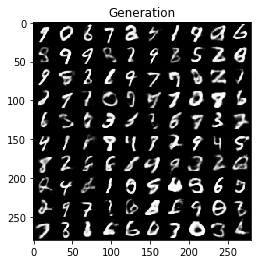

Step: 11000 in 12.91s :: Loss: 99.552 => Recons.: 77.599, KL: 21.952
Step: 12000 in 12.79s :: Loss: 96.284 => Recons.: 74.708, KL: 21.576
Step: 13000 in 12.80s :: Loss: 96.492 => Recons.: 75.207, KL: 21.284
Step: 14000 in 12.96s :: Loss: 100.443 => Recons.: 78.341, KL: 22.102
Step: 15000 in 13.00s :: Loss: 94.438 => Recons.: 72.947, KL: 21.491
Step: 16000 in 13.05s :: Loss: 99.040 => Recons.: 76.716, KL: 22.324
Step: 17000 in 12.97s :: Loss: 100.650 => Recons.: 78.076, KL: 22.574
Step: 18000 in 13.08s :: Loss: 100.316 => Recons.: 77.328, KL: 22.988
Step: 19000 in 12.94s :: Loss: 99.568 => Recons.: 76.764, KL: 22.804
Step: 20000 in 12.97s :: Loss: 98.690 => Recons.: 75.953, KL: 22.737


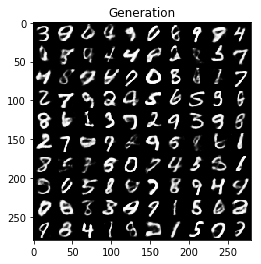

Step: 21000 in 13.17s :: Loss: 98.833 => Recons.: 76.152, KL: 22.681
Step: 22000 in 12.61s :: Loss: 95.320 => Recons.: 73.585, KL: 21.734
Step: 23000 in 12.78s :: Loss: 97.065 => Recons.: 74.955, KL: 22.111
Step: 24000 in 12.98s :: Loss: 94.651 => Recons.: 72.695, KL: 21.956
Step: 25000 in 13.09s :: Loss: 96.647 => Recons.: 74.226, KL: 22.421
Step: 26000 in 12.75s :: Loss: 97.107 => Recons.: 74.446, KL: 22.661
Step: 27000 in 13.00s :: Loss: 98.218 => Recons.: 75.415, KL: 22.803
Step: 28000 in 12.62s :: Loss: 100.824 => Recons.: 78.307, KL: 22.518
Step: 29000 in 12.92s :: Loss: 96.154 => Recons.: 74.383, KL: 21.771
Step: 30000 in 11.57s :: Loss: 92.506 => Recons.: 70.784, KL: 21.722


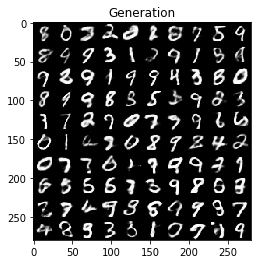

Step: 31000 in 9.72s :: Loss: 93.486 => Recons.: 71.526, KL: 21.960
Step: 32000 in 9.57s :: Loss: 98.094 => Recons.: 75.371, KL: 22.723
Step: 33000 in 9.48s :: Loss: 99.174 => Recons.: 76.454, KL: 22.720
Step: 34000 in 9.55s :: Loss: 92.105 => Recons.: 70.702, KL: 21.404
Step: 35000 in 9.61s :: Loss: 96.614 => Recons.: 73.842, KL: 22.772
Step: 36000 in 10.11s :: Loss: 96.390 => Recons.: 74.267, KL: 22.124
Step: 37000 in 9.58s :: Loss: 95.047 => Recons.: 72.831, KL: 22.216
Step: 38000 in 9.48s :: Loss: 95.449 => Recons.: 72.894, KL: 22.556
Step: 39000 in 9.46s :: Loss: 95.938 => Recons.: 73.159, KL: 22.779
Step: 40000 in 9.56s :: Loss: 96.721 => Recons.: 74.188, KL: 22.532


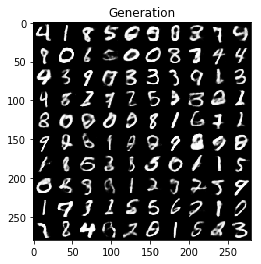

Step: 41000 in 9.64s :: Loss: 95.570 => Recons.: 73.123, KL: 22.447
Step: 42000 in 9.72s :: Loss: 99.641 => Recons.: 77.886, KL: 21.755
Step: 43000 in 9.56s :: Loss: 96.460 => Recons.: 73.993, KL: 22.467
Step: 44000 in 9.74s :: Loss: 98.445 => Recons.: 75.656, KL: 22.788
Step: 45000 in 9.86s :: Loss: 95.248 => Recons.: 73.270, KL: 21.978
Step: 46000 in 9.74s :: Loss: 94.402 => Recons.: 71.813, KL: 22.590
Step: 47000 in 9.56s :: Loss: 93.939 => Recons.: 72.373, KL: 21.566
Step: 48000 in 9.54s :: Loss: 96.958 => Recons.: 73.661, KL: 23.297
Step: 49000 in 6.26s :: Loss: 93.778 => Recons.: 71.822, KL: 21.956
Step: 50000 in 3.75s :: Loss: 97.367 => Recons.: 74.376, KL: 22.992


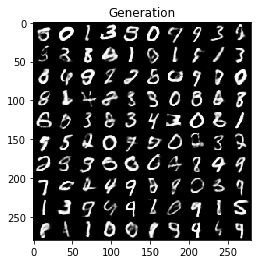

In [11]:
sess.run(init_op)
start_time = time.time()
for stp in range(1, nb_steps+1):
    x_np, _ = mnist.train.next_batch(batch_size)
    _, loss_np, rec_np, kl_np = sess.run([optim_op, loss, loglikelihood, kl], feed_dict={x: x_np})
    if stp % 1000 == 0:
        end_time = time.time()
        print('Step: {:d} in {:.2f}s :: Loss: {:.3f} => Recons.: {:.3f}, KL: {:.3f}'.format(stp, end_time - start_time, loss_np, -rec_np, kl_np))
        start_time = end_time
    if stp % 10000 == 0:
        z_np = np.random.randn(100, z_dim)
        x_hat_np = sess.run(x_hat, feed_dict={z: z_np})
        render_images(x_hat_np)